## Data Wrangling: WeRateDogs Twitter Data

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Gathering

In [2]:
#download the file twitter-archive-enhanced.csv manually
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


متعمليش الخطوه اللي تحت دي 

In [4]:
# getting the image prediction file programmatically  using the given url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = 'image_predictions.tsv'
response = requests.get(url)

# save to .tsv file
# check if the file exist donot do this again
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

In [3]:
# read the image prediction file and save to pandas DataFrame
image_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

# check for the data top 5 rows
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#I tried to set up a twitter developer account, but my application was not approved.

In [ ]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [4]:
tweet_json_file = 'tweet-json.txt'

In [5]:
# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
df_tweet_data_extra = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_tweet_data_extra.head(30)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [6]:
df_tweet_data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [7]:
df_tweet_data_extra.to_csv('tweet_data_extra.csv', index = False)

# Assessing

twitter_archive
image_predictions
df_tweet_data_extra

In [8]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
sum(twitter_archive.expanded_urls.isnull())

59

In [12]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Daisy          7
Bailey         7
Toby           7
Buddy          7
an             7
Leo            6
Milo           6
Stanley        6
Dave           6
Jax            6
Rusty          6
Jack           6
Oscar          6
Bella          6
Scout          6
Koda           6
Phil           5
            ... 
Jersey         1
Furzey         1
Aubie          1
Ebby           1
Crouton        1
Lorelei        1
Izzy           1
Leonidas       1
Lenox          1
Bonaparte      1
Harry          1
Blue           1
Jarvis         1
Patch          1
Sage           1
Jeb            1
Hamrick        1
Geno           1
Blu            1
Stormy         1
Terrenth       1
Puff           1
Banjo          1
Julius         1
Jonah          1
Sonny          1
Gert           1
Alexander     

In [11]:
twitter_archive.name.tail(10)

2346     the
2347       a
2348       a
2349      an
2350       a
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, dtype: object

In [12]:
twitter_archive.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
twitter_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_tweet_data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


اخر الاتنين اللي تحت مش مهمين 

In [17]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(df_tweet_data_extra))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [18]:
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

## Quality issue

###  'twitter_archive' table  
- 1) columns  ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id' , 'retweeted_status_user_id' ,'retweeted_status_timestamp' ) have too many missing values and might not be needed in this analysis so i drop it 
- 2) in columns ( doggo , floofer ,pupper ,puppo ) replace 'None' with NAN  to calculate  the missing values in this columns
- 3) There are 2297 tweets with expanded_urls (links to images) indicating 59 tweets with missing data 
- 4) drop 'expanded_urls' columns i will not use in analysis as it repeat in image_predictions table as "jpg_url"
- 5) Change tweet_id to an object datatype in the 3 tables 
- 6 )the rating_denominator = 10 will be used & other value will neglected 
- 7) the rating_numerator < 20 will be used & other value will neglected 
- 8)  Some of the rows from the tail() output above have invalid strings in -- the name column, e.g. "a", "an", "in". These words are all the 3rd word in the tweet these will change to 'none '
- 9) 'timestamp' column convert its data type from string to data time 
- 10) Drop all rows containing retweets, where these columns will be non-null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.



### 'image_predictions' table 
- 
- Change tweet_id to an object datatype
### 'df_tweet_data_extra' table 
- Change tweet_id to an object datatype 


- the numders of rows  in 'twitter_archive' table is 2356 but in 'image_predictions' table is 2075

## Tideness issue

### 'twitter_archive' table 

- ( doggo , floofer ,pupper ,puppo ) colums it is must be a value for a new column dog_type not as separated column

-  Combine the three  datasets together.

# Cleaning Data

In [16]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean  = image_predictions.copy()
df_tweet_data_extra_clean  = df_tweet_data_extra.copy()

# 1) Twitter archive data:

Only want original ratings (Delete retweets and replies).

Code: Select the rows from twitter_archive_df that retweeted_status_id and in_reply_to_user_id columns that is null

There are 181 retwe`ets, and we’re only interested in “original tweets”.

In [17]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
#Define
#Drop all rows containing retweets, where these columns will be non-null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

In [19]:
# test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [20]:
list(twitter_archive_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [21]:
# Define

# e) Since retweets and replies will be removed, the column "retweeted_status_timestamp" will 
#        be removed as it will no longer provide any useful information.


#  Remove column "rating_denominator" once all the values that != 10 have been removed since this
#    will no longer provide any useful information.



# Code
drop_cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
             'retweeted_status_user_id','retweeted_status_timestamp',]


twitter_archive_clean.drop(drop_cols, inplace=True, axis=1)

In [22]:
# Test
list(twitter_archive_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [ ]:
# define drop 'expanded_urls' columns i will not use in analysis as it repeat in image_predictions table as "jpg_url"

In [23]:
# code 
twitter_archive_clean.drop('expanded_urls', inplace=True, axis=1)

In [24]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [25]:
# Define
# correct  datatype of 'tweet_id' to be string instead of integers
# code 
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
df_tweet_data_extra_clean['tweet_id'] = df_tweet_data_extra_clean['tweet_id'].astype(str)
# Define
# correct  datatype of 'timestamp' to be  datatime instead of string
# code 
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)



In [26]:
# test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


In [27]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


In [28]:
# define 
# want to kknow the missing data exactly in columns  doggo, floofer ,pupper ,puppo   so i will replace  'None' with nan
# code 
twitter_archive_clean['doggo'].replace('None', np.nan, inplace=True)
twitter_archive_clean['floofer'].replace('None', np.nan, inplace=True)
twitter_archive_clean['pupper'].replace('None', np.nan, inplace=True)
twitter_archive_clean['puppo'].replace('None', np.nan, inplace=True)

In [29]:
# test 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


In [30]:
# Define
# a)  Removing multiple cases of where the denominator of rating != 10.

# Code
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].index, inplace = True)

In [31]:
# Test
twitter_archive_clean.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

In [32]:
twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
666       1
420       2
182       1
75        1
27        1
26        1
17        1
15        1
14       43
13      307
12      500
11      425
10      442
9       155
8        98
7        53
6        32
5        36
4        15
3        19
2         9
1         7
0         2
Name: rating_numerator, dtype: int64

In [33]:
# Define
# b) Multiple cases of where the numerator of rating < 20. These entries will be removed.

# Code
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_numerator > 20].index, inplace = True)

In [34]:
twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

17      1
15      1
14     43
13    307
12    500
11    425
10    442
9     155
8      98
7      53
6      32
5      36
4      15
3      19
2       9
1       7
0       2
Name: rating_numerator, dtype: int64

In [35]:
# define 
#It looks like the dog names are all capitalized, so words that begin in lowercase are probably not names, 
#like "a", "the" and "an". Here's the list of these "names".

In [35]:
# list all names that are NOT capitalized
names_mask = twitter_archive_clean.name.str.contains('^[a-z]', regex = True)
twitter_archive_clean[names_mask].name.value_counts().sort_index()

a               54
actually         2
all              1
an               5
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
unacceptable     1
very             4
Name: name, dtype: int64

In [36]:
twitter_archive_clean.loc[names_mask, 'name'] = "none"

In [37]:
#Test
# All these entries were changed to "none"
twitter_archive_clean[names_mask].name.value_counts().sort_index()

none    101
Name: name, dtype: int64

# Tideness issue



## 'twitter_archive' table

In [38]:
# Define: use loc to add a new column dog_class = doggo, floofer, pupper or poppo. NaN will be used if not any of the previous

# Code
twitter_archive_clean.loc[twitter_archive_clean['doggo'] == 'doggo', 'dog_class'] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean['floofer'] == 'floofer', 'dog_class'] = 'floofer'
twitter_archive_clean.loc[twitter_archive_clean['pupper'] == 'pupper', 'dog_class'] = 'pupper'
twitter_archive_clean.loc[twitter_archive_clean['puppo'] == 'puppo', 'dog_class'] = 'puppo'

In [39]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_class
698,786363235746385920,2016-10-13 00:29:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,13,10,Rizzo,doggo,NaN,NaN,NaN,doggo
1625,684830982659280897,2016-01-06 20:16:44,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This little fella really hates stairs. Prefers...,13,10,None,NaN,NaN,pupper,NaN,pupper
1417,698549713696649216,2016-02-13 16:50:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Claude. He's trying to be seductive bu...,9,10,Claude,NaN,NaN,NaN,NaN,NaN
614,796759840936919040,2016-11-10 17:02:03,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Romeo. He was just told that it's...,11,10,Romeo,NaN,NaN,NaN,NaN,NaN
1352,703774238772166656,2016-02-28 02:50:28,"<a href=""http://twitter.com/download/iphone"" r...","""YOU CAN'T HANDLE THE TRUTH"" both 10/10 https:...",10,10,None,NaN,NaN,NaN,NaN,NaN
1653,683462770029932544,2016-01-03 01:39:57,"<a href=""http://twitter.com/download/iphone"" r...","""Hello forest pupper I am house pupper welcome...",8,10,None,NaN,NaN,pupper,NaN,pupper
864,762464539388485633,2016-08-08 01:44:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. His father was a bear and his m...,12,10,Buddy,NaN,NaN,NaN,NaN,NaN
1661,683030066213818368,2016-01-01 21:00:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Lulu. She's contemplating all her unre...,10,10,Lulu,NaN,NaN,NaN,NaN,NaN
471,816697700272001025,2017-01-04 17:27:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Binky. She appears to be rather h*ckin...,12,10,Binky,NaN,NaN,NaN,NaN,NaN
740,780543529827336192,2016-09-26 23:04:13,"<a href=""http://twitter.com/download/iphone"" r...",Here's a perturbed super floof. 12/10 would sn...,12,10,None,NaN,NaN,NaN,NaN,NaN


In [40]:
# test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2145 non-null object
timestamp             2145 non-null datetime64[ns]
source                2145 non-null object
text                  2145 non-null object
rating_numerator      2145 non-null int64
rating_denominator    2145 non-null int64
name                  2145 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                233 non-null object
puppo                 25 non-null object
dog_class             343 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 217.9+ KB


In [41]:
# dropping unneded doggo, floofer, pupper or poppo columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2145 non-null object
timestamp             2145 non-null datetime64[ns]
source                2145 non-null object
text                  2145 non-null object
rating_numerator      2145 non-null int64
rating_denominator    2145 non-null int64
name                  2145 non-null object
dog_class             343 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 150.8+ KB


In [ ]:
#define 
# Merging documents to form a working dataframe

In [43]:
# code 
all_data = pd.merge(twitter_archive_clean , df_tweet_data_extra_clean , left_on='tweet_id', right_on='tweet_id', how='inner')
all_data = pd.merge(all_data , image_predictions_clean , left_on='tweet_id', right_on='tweet_id', how='inner')
#test
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_class             305 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-n

In [44]:
# test 
all_data.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_class,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [45]:
# define 
# drop 'rating_denominator' column 
# code 
all_data.drop('rating_denominator', inplace=True, axis=1)

In [46]:
# test
all_data.head(1)

,tweet_id,timestamp,source,text,rating_numerator,name,dog_class,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [ ]:
بكرا المفروض اشوف القيم بتعات  p1

# analysis & visiualization

In [49]:
all_data.retweet_count.describe()

count     1971.000000
mean      2767.880771
std       4687.479281
min         16.000000
25%        622.500000
50%       1350.000000
75%       3222.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [50]:
all_data.favorite_count.describe()

count      1971.000000
mean       8921.838153
std       12260.445319
min          81.000000
25%        1956.500000
50%        4134.000000
75%       11347.500000
max      132810.000000
Name: favorite_count, dtype: float64

In [51]:
# the most favorite picture 
all_data.query('favorite_count == 132810')

,tweet_id,timestamp,source,text,rating_numerator,name,dog_class,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
309,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13,None,puppo,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


In [52]:
# the most favorite picture 
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg') 

In [53]:
# picture has the min retweet_count 
all_data.query('retweet_count ==  16')

,tweet_id,timestamp,source,text,rating_numerator,name,dog_class,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1954,666102155909144576,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,11,None,NaN,16,81,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True


In [54]:
# picture has the min retweet_count 
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg') 

In [56]:
all_data.dog_class.value_counts()

pupper     211
doggo       63
puppo       23
floofer      8
Name: dog_class, dtype: int64

Text(0,0.5,'dog_counts')

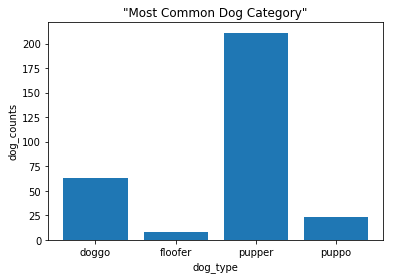

In [57]:
# to know Most Common Dog Category 
dog_type = ['pupper', 'doggo', 'puppo', 'floofer']
dog_counts = [211, 63 , 23,8]
plt.bar(dog_type ,dog_counts)
plt.title('"Most Common Dog Category"')
plt.xlabel('dog_type')
plt.ylabel('dog_counts')

### Visualization :  Scatter plot between favorites and retweets

Text(0.5,1,'favorite_count and retweet_count Scatter plot')

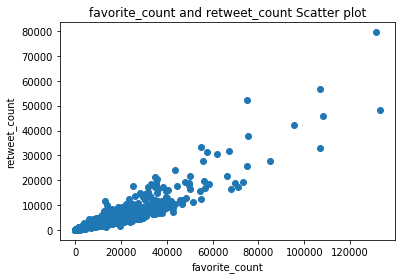

In [58]:
plt.scatter(all_data['favorite_count'], all_data['retweet_count'])
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('favorite_count and retweet_count Scatter plot')

### Analyses
- As expected there is a big positive correlation between the retweets and favorites.

# Insights

- the max favorite count is  132810
- the min retweet_count is 16
- Most Common Dog Category is pupper
- As expected there is a big positive correlation between the retweets and favorites.

# save combined & clean data to twitter_archive_master.csv

In [59]:
all_data.to_csv('twitter_archive_master.csv', index = False)